In [6]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_palette('colorblind'); sns.set_color_codes()
plt.style.use('classic')

import holoviews as hv
hv.notebook_extension('bokeh', 'matplotlib')

import param
import paramnb

import numpy as np
import pandas as pd

import scipy.stats as stats

###### Note: Bokeh Distributions are currently broken

b':Distribution   (Value)'
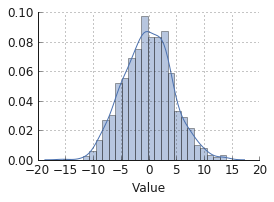

In [7]:
%%output backend='matplotlib'
%%opts Distribution[fig_size=110 aspect=1.5]

# Figure 4.2 in 'Statistical Rethinking', R. McElreath
#      take 16 successive uniformly distributed size steps  

pos  = np.random.uniform(-2, 2, size=(16, 1000))  # Sum{i,j, i=1:16}
pos[0,:]=0.
rwalk = np.cumsum(pos,axis=0)

hv.Distribution( rwalk[15,:])

##### Plot 1000 random walks

In [27]:
%%output backend='bokeh'
%%opts Path [width=600 height=200]
steps = np.linspace(0.,15., 16)
hv.Path((steps,rwalk))(style=dict(alpha=0.02, color='darkred'))

b':Path   [x,y]'

Issues I want to fix:
* figure out how to add a side hist that uses a crosssection rwalk[i,:] for i in [0,16)
* figure out he number of ticks on an axis. The defaults do not really work
* figure out using a slider to control i to specify which rwalk[i,:] cross section to use
* figure out how to position the graphs further to the left

In [26]:
%%output backend='bokeh'
%%opts Path [width=400 height=200 shared_axes=False]
%%opts Histogram [invert_axes=True height=200 width=150  shared_axes=False]

(frequencies, edges) = np.histogram(rwalk[15,:], 20)
p=hv.Path((steps,rwalk))(style=dict(alpha=0.02, color='darkred')) +\
  hv.Histogram(frequencies,edges)
p

:Layout
   .Path.I      :Path   [x,y]
   .Histogram.I :Histogram   [x]   (Frequency)